# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

1. Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan.
2. Tentukan posisi centroid secara random.
3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. 
4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 




---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [26]:
#code here
df1 = df[['Umur','Skor Belanja (1-100)']].fillna(method="ffill")

In [27]:
for column in df1.columns:
    Q1 , Q3 = df1[column].quantile(0.25) , df1[column].quantile(0.75)
    IQR = Q3 - Q1
    Min ,Max = Q1 - 1.5*IQR , Q3 + 1.5*IQR
    df1 = df1.loc[(df1[column]>= Min) & (df1[column]<=Max)]

In [34]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
scaled_feature = s.fit_transform(df1.values)

df1_scaled = pd.DataFrame(scaled_feature , columns = df1.columns , index = df1.index)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


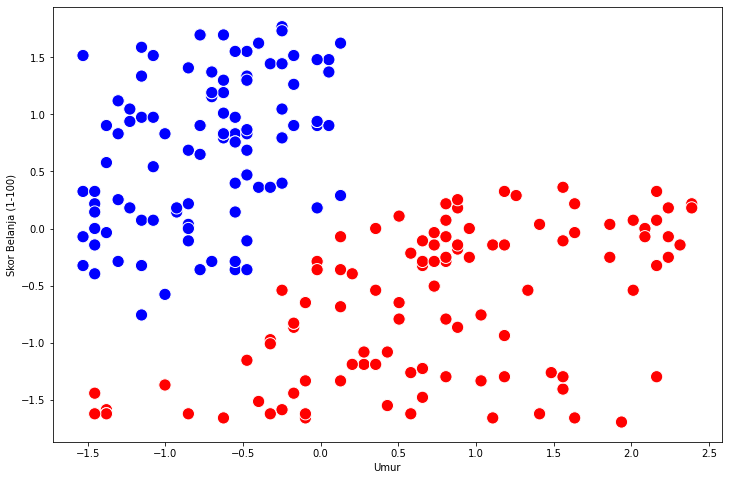

In [56]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
km = KMeans(n_clusters=2).fit(df1_scaled)

df1_scaled['labels'] = km.labels_

f,ax = plt.subplots(figsize = (12,8))
sns.scatterplot(df1_scaled['Umur'] , df1_scaled['Skor Belanja (1-100)'],hue = df1_scaled['labels'] , legend=None,s=150,palette = ['red','blue'])

plt.show()


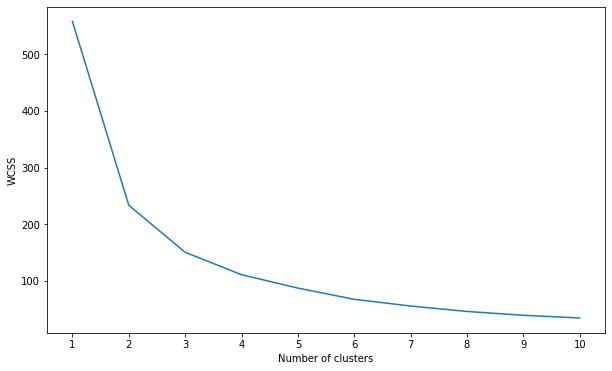

In [49]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters = i).fit(df1_scaled)
    clusters.append(km.inertia_)

f,ax = plt.subplots(figsize = (10,6))
plt.plot([i for i in range(1,11)] , clusters)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xticks([i for i in range(1,11)])
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


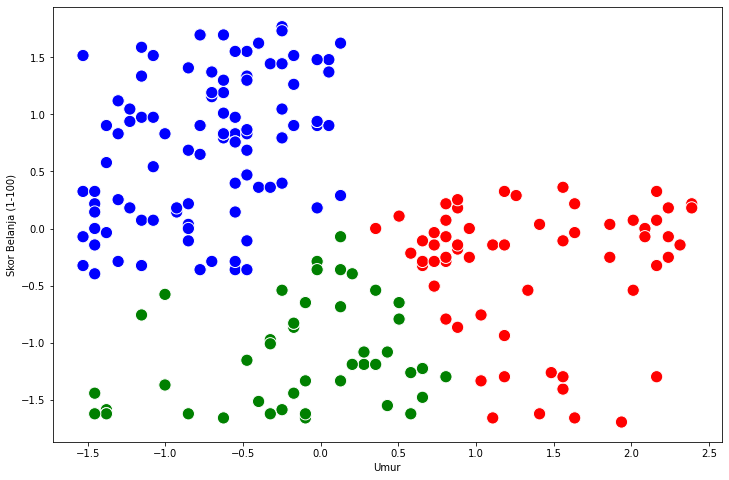

In [62]:
km = KMeans(n_clusters=3).fit(df1_scaled)

df1_scaled['labels'] = km.labels_

f,ax = plt.subplots(figsize = (12,8))
sns.scatterplot(df1_scaled['Umur'] , df1_scaled['Skor Belanja (1-100)'],hue = df1_scaled['labels'] , legend=None,s=150,palette =['blue','red','green'])
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:
- Terdapat 3 segmentasi pembeli yaitu pembeli berusia muda dengan skor belanja tinggi , pembeli berusia muda dengan skor belanja rendah , dan pembeli berusia lebih tua denga skor belanja rendah. Penjualan ada baiknya difokuskan ke kelompok usia muda dengan segmentasi skor belanja tinggi untuk memaksimalkan penjualan (warna biru) , dan apabila memungkinkan membuat pembeli kluster hijau agar mengalami peningkatan skor belanja dengan strategi tertentu.